# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.<br>

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:<br>

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [894]:
# Removing warnings

import warnings
warnings.filterwarnings('ignore')

## Import libraries

In [895]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing train_test_split and MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Reading Data

In [896]:
# Read the data

bike_sharing = pd.read_csv("day.csv")
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##  Understanding the data

In [897]:
# Structure of the data
bike_sharing.shape

(730, 16)

In [898]:
#Information of the data
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [899]:
# converting the dteday to the correct format

bike_sharing["dteday"]=pd.to_datetime(bike_sharing["dteday"],format="%d-%m-%Y")

In [900]:
# rechecking the datatype

bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [901]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data quality check

In [902]:
# Checking the null values

bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [903]:
# Check of duplicates

bike = bike_sharing.copy()

In [904]:
bike.drop_duplicates(subset=None,inplace=True)

In [905]:
bike.shape

(730, 16)

In [906]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [907]:
# To check the unique values in the data

for col in bike:
    print(bike[col].value_counts(ascending=False))

730    1
251    1
249    1
248    1
247    1
      ..
485    1
484    1
483    1
482    1
1      1
Name: instant, Length: 730, dtype: int64
2019-10-25    1
2019-12-22    1
2019-03-08    1
2018-01-15    1
2018-03-18    1
             ..
2019-11-11    1
2018-12-06    1
2019-02-06    1
2019-04-09    1
2018-12-21    1
Name: dteday, Length: 730, dtype: int64
3    188
2    184
1    180
4    178
Name: season, dtype: int64
1    365
0    365
Name: yr, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64
1    504
0    226
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64
10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     

In [908]:
# dropping unnecessary column
# - instant, dteday, casual, registered


bike.drop(["instant","dteday","casual","registered"],axis=1,inplace=True)

In [909]:
# recheck the data with columns

bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [910]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


## Visualisation

### Understanding the numerical variable

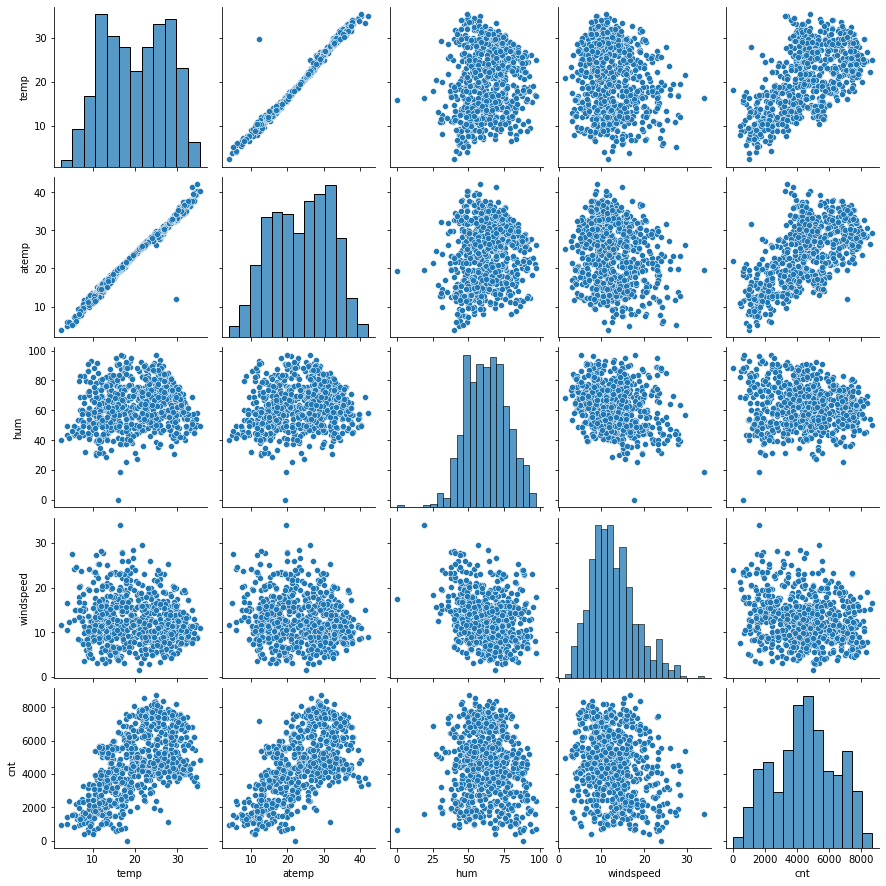

In [770]:
# plotting for numerical variable

sns.pairplot(data=bike,vars=["temp","atemp","hum","windspeed","cnt"])
plt.show()

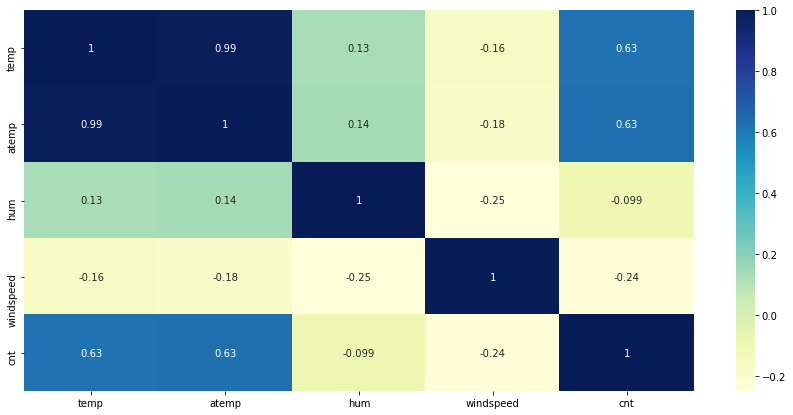

In [771]:
# To have more clear understanding, using correlation

columns=["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,7))
sns.heatmap(bike[columns].corr(),annot=True,cmap="YlGnBu")
plt.show()

We could see that, temp and atemp have high correlation

### Understanding the categorical variable

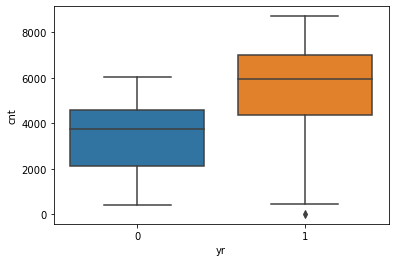

In [772]:
# Boxplot between yr and cnt

sns.boxplot(data=bike,x="yr",y="cnt")
plt.show()

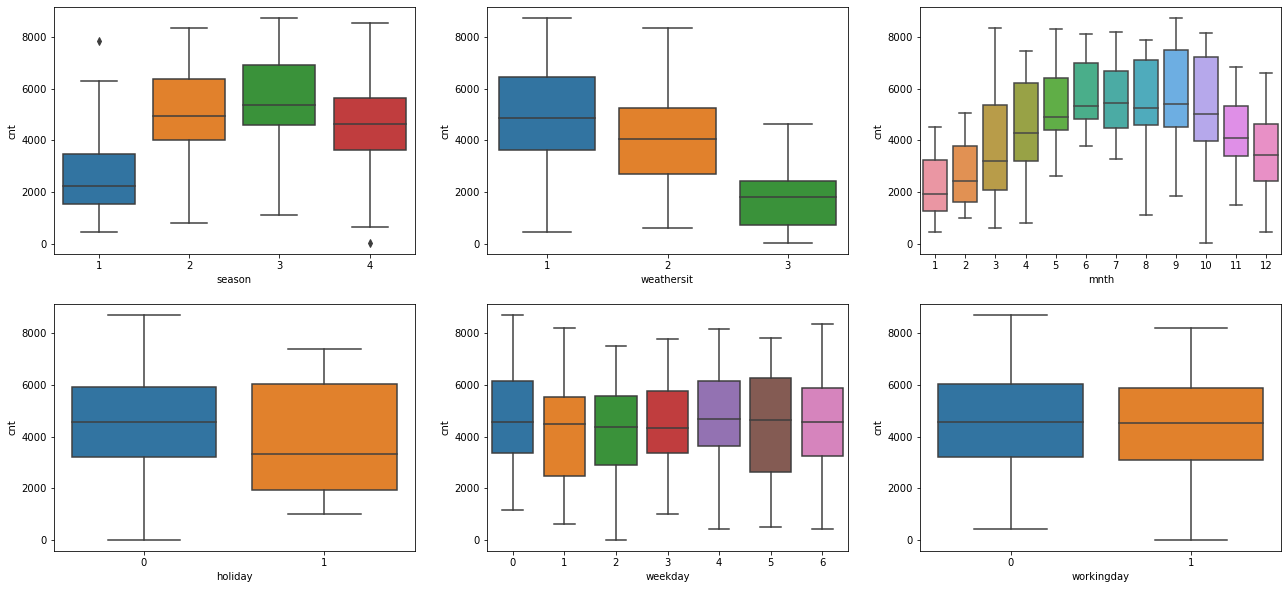

In [773]:
# Boxplots between (season,weathersit,mnth,holiday,weekday,workingday) and cnt (target variable)

plt.figure(figsize=(22,10))
plt.subplot(2,3,1)
sns.boxplot(data=bike,x="season",y="cnt")
plt.subplot(2,3,2)
sns.boxplot(data=bike,x="weathersit",y="cnt")
plt.subplot(2,3,3)
sns.boxplot(data=bike,x="mnth",y="cnt")
plt.subplot(2,3,4)
sns.boxplot(data=bike,x="holiday",y="cnt")
plt.subplot(2,3,5)
sns.boxplot(data=bike,x="weekday",y="cnt")
plt.subplot(2,3,6)
sns.boxplot(data=bike,x="workingday",y="cnt")
plt.show()

- We could see that at fall the median is hgigher as compared to other season
- The demand in holiday is less as compared to not having holiday, as the median range is lower for holiday
- Also we can notice that weathersit for 1 has the highest median range

## Coverting integer variables to categorical variable

In [911]:
# Converting weekday to categorical

bike["weekday"].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [854]:
bike.weekday.value_counts()

Monday       105
Tuesday      105
Friday       104
Saturday     104
Sunday       104
Wednesday    104
Thursday     104
Name: weekday, dtype: int64

In [855]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 74.1+ KB


In [912]:
# Converting month to categorical

bike["mnth"]=bike["mnth"].map({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})

In [857]:
bike.mnth.value_counts()

December     62
May          62
July         62
March        62
August       62
January      62
October      62
June         60
April        60
November     60
September    60
February     56
Name: mnth, dtype: int64

In [858]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 74.1+ KB


In [913]:
# Converting season to categorical

bike["season"]=bike["season"].map({1:"spring",2:"summer",3:"fall",4:"winter"})

In [860]:
bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [861]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 74.1+ KB


In [914]:
# Converting weathersit to categorical

bike["weathersit"]=bike["weathersit"].map({1:"Clear",2:"Mist & Cloudy",3:"Light Snow",4:"Snow & Fog"})

In [863]:
bike.weathersit.value_counts()

Clear            463
Mist & Cloudy    246
Light Snow        21
Name: weathersit, dtype: int64

In [864]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


## Creating dummy variables

In [915]:
# Creating dummy for the categorical variable

season=pd.get_dummies(bike["season"],drop_first = True)
mnth=pd.get_dummies(bike["mnth"],drop_first = True)
weekday=pd.get_dummies(bike["weekday"],drop_first = True)
weathersit=pd.get_dummies(bike["weathersit"],drop_first = True)

In [916]:
# Concatinating th columns to the main dataset

bike = pd.concat([bike, season], axis = 1)
bike = pd.concat([bike, mnth], axis = 1)
bike = pd.concat([bike, weekday], axis = 1)
bike = pd.concat([bike, weathersit], axis = 1)

In [917]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
0,spring,0,January,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,January,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [918]:
# Dropping the columns

bike.drop(["season","mnth","weekday","weathersit"],axis=1,inplace=True)

## Split the data

In [919]:
df_train ,df_test=train_test_split(bike,train_size=0.7,test_size=0.3,random_state=100)

## Scaling 

In [920]:
scaler = MinMaxScaler()
var = ["temp","atemp","hum","windspeed","cnt"]
df_train[var] = scaler.fit_transform(df_train[var])

In [921]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [922]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


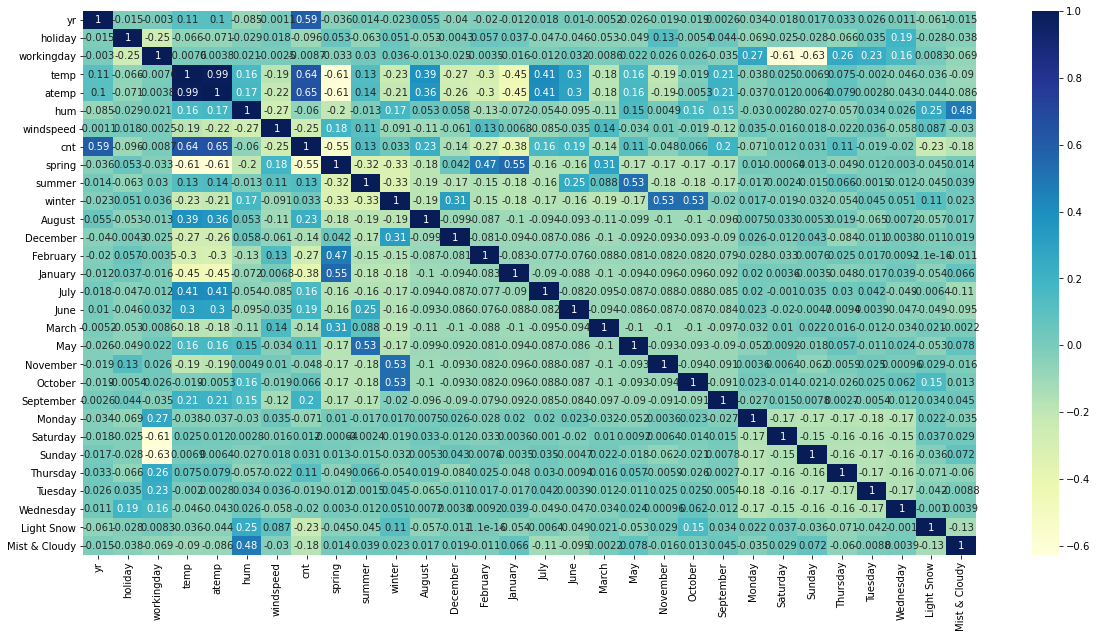

In [873]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

## Variable X and y

In [923]:
y_train = df_train.pop("cnt")
X_train = df_train

In [924]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [925]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [926]:
X_train.shape

(510, 29)

### Selecting variables with RFE method

In [927]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [928]:
rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [929]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 10),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 15),
 ('May', False, 7),
 ('November', True, 1),
 ('October', False, 12),
 ('September', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11),
 ('Light Snow', True, 1),
 ('Mist & Cloudy', True, 1)]

In [930]:
col = X_train.columns[rfe.support_]

In [931]:
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'December', 'January', 'July', 'November', 'September',
       'Light Snow', 'Mist & Cloudy'],
      dtype='object')

## Building Model with statsmodel

In [932]:
X_train_rfe = X_train[col]

#### Model 1

In [933]:
# Add constant

import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe)
lm_model1 = lm1.fit()

In [934]:
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,spring,summer,winter,December,January,July,November,September,Light Snow,Mist & Cloudy
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1


In [935]:
lm_model1.params

const            0.320243
yr               0.230328
holiday         -0.091228
temp             0.479977
hum             -0.160227
windspeed       -0.188457
spring          -0.061737
summer           0.040767
winter           0.103435
December        -0.037199
January         -0.043748
July            -0.055495
November        -0.040949
September        0.074891
Light Snow      -0.248116
Mist & Cloudy   -0.055876
dtype: float64

In [936]:
print(lm_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.34e-189
Time:                        20:46:35   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3202      0.036      8.886

In [937]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [938]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
14,Mist & Cloudy,2.32
0,yr,2.09
11,November,1.83
9,January,1.75


#### Model 2

In [939]:
X_train_new = X_train_new.drop(['hum'], axis=1)

In [940]:
X_train_rfe1=sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_rfe1)
lm_model_2 = lm2.fit()

In [941]:
print(lm_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.57e-186
Time:                        20:46:56   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2466      0.032      7.679

In [942]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
10,November,1.80
8,January,1.66
9,July,1.59
13,Mist & Cloudy,1.56


#### Model 3

In [943]:
X_train_new = X_train_new.drop(['summer'], axis=1)

In [944]:
X_train_rfe2=sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_rfe2)
lm_model_3 = lm3.fit()

In [945]:
print(lm_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.08e-186
Time:                        20:47:25   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2893      0.025     11.427

In [946]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,winter,2.54
4,spring,2.36
0,yr,2.06
9,November,1.80
7,January,1.65
12,Mist & Cloudy,1.53
6,December,1.46
8,July,1.36


#### Model 4

In [947]:
X_train_new = X_train_new.drop(['windspeed'], axis=1)

In [948]:
X_train_rfe3=sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_rfe3)
lm_model_4 = lm4.fit()

In [949]:
print(lm_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          4.48e-180
Time:                        20:48:25   Log-Likelihood:                 484.75
No. Observations:                 510   AIC:                            -943.5
Df Residuals:                     497   BIC:                            -888.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2190      0.023      9.374

In [950]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.04
4,winter,2.51
0,yr,2.05
3,spring,1.93
8,November,1.78
6,January,1.65
11,Mist & Cloudy,1.52
5,December,1.46
7,July,1.34
9,September,1.20


#### Model 5

In [951]:
X_train_new = X_train_new.drop(['January'], axis=1)

In [952]:
X_train_rfe4=sm.add_constant(X_train_new)
lm5 = sm.OLS(y_train,X_train_rfe4)
lm_model_5 = lm5.fit()

In [953]:
print(lm_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.34e-180
Time:                        20:48:51   Log-Likelihood:                 482.63
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     498   BIC:                            -890.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2075      0.023      9.125

In [954]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.99
4,winter,2.49
0,yr,2.05
7,November,1.77
10,Mist & Cloudy,1.51
5,December,1.42
6,July,1.33
3,spring,1.29
8,September,1.20
9,Light Snow,1.07


#### Model 6

In [955]:
X_train_new = X_train_new.drop(['December'], axis=1)

In [956]:
X_train_rfe5=sm.add_constant(X_train_new)
lm6 = sm.OLS(y_train,X_train_rfe5)
lm_model_6 = lm6.fit()

In [957]:
print(lm_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.0
Date:                Mon, 10 May 2021   Prob (F-statistic):          7.68e-181
Time:                        20:49:14   Log-Likelihood:                 480.95
No. Observations:                 510   AIC:                            -939.9
Df Residuals:                     499   BIC:                            -893.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1990      0.022      8.922

In [958]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.99
0,yr,2.05
4,winter,1.89
6,November,1.57
9,Mist & Cloudy,1.51
5,July,1.33
3,spring,1.25
7,September,1.20
1,holiday,1.06
8,Light Snow,1.06


#### Model 7 ( Final model)

In [959]:
X_train_new = X_train_new.drop(['November'], axis=1)

In [961]:
X_train_rfe6=sm.add_constant(X_train_new)
lm7 = sm.OLS(y_train,X_train_rfe6)
lm_model_7 = lm7.fit()

In [962]:
print(lm_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.16e-181
Time:                        20:50:29   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1938      0.022      8.750

In [963]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.99
0,yr,2.05
8,Mist & Cloudy,1.51
4,winter,1.33
5,July,1.33
3,spring,1.25
6,September,1.19
7,Light Snow,1.06
1,holiday,1.04


The adjusted R square is explaining 81% of the variance.

## Residual analysis of the train dataset

To understand the distribution of the error terms ( assumption - it should be normally distributed)

In [970]:
y_train_cnt = lm_model_7.predict(X_train_rfe6)

In [971]:
# residual 

res = y_train - y_train_cnt

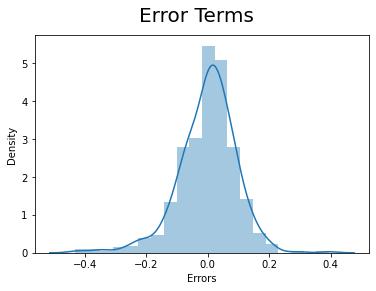

In [976]:
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 10)
plt.show()

## Making predictions using the final model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final

### Applying the scaling on the test sets

In [978]:
X_train_rfe6.columns

Index(['const', 'yr', 'holiday', 'temp', 'spring', 'winter', 'July',
       'September', 'Light Snow', 'Mist & Cloudy'],
      dtype='object')

In [979]:
num_vars = ["temp","atemp","hum","windspeed","cnt"]

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [986]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test


In [980]:
y_test = df_test.pop("cnt")
X_test = df_test

In [981]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [982]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [983]:
X_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [987]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [988]:
X_test_new.head()

,const,yr,holiday,temp,spring,winter,July,September,Light Snow,Mist & Cloudy
184,1.0,0,1,0.831783,0,0,1,0,0,1
535,1.0,1,0,0.901354,0,0,0,0,0,0
299,1.0,0,0,0.511964,0,1,0,0,0,1
221,1.0,0,0,0.881625,0,0,0,0,0,0
152,1.0,0,0,0.817246,0,0,0,0,0,0


In [989]:
# Making predictions
y_pred = lm_model_7.predict(X_test_new)

#### Check the R square for the test data

In [990]:
from sklearn.metrics import r2_score

In [991]:
r2_score(y_test, y_pred)

0.8092200832884748

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

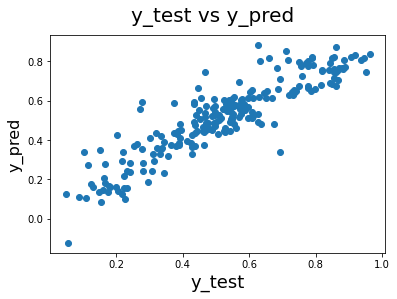

In [992]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()


We can see that the equation of our best fitted line is:

count = 0.233 x yr - 0.101  x  holiday + 0.471 x temp - 0.110 x spring + 0.055 x winter - 0.0.068 x July + 0.0658 x September - 0.3002 x Light snow - 0.0796 x Misty & Cloudy


Hence, we can interpret that the:- <br>
- demand increases with year, increase in temp, during the Winter season and September month
- demand decreases in holiday, spring,July, Light snow, Misty and Cloud